# Taller 6: Redes Nueronales

## Importar librerias

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

## Punto 1. Clasificación con redes neuronales - Datos iris

### Datos, Selección y División

Descarga Datos Iris

In [2]:
iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Selección de Especimen

In [3]:
y = tf.keras.utils.to_categorical(iris.target, num_classes=3)
y_s = y[:,[0]]
y_s

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

División de datos (entrenamiento, validación, prueba)

In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, y_s, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

X_train.shape

(96, 4)

In [5]:
std_scl = StandardScaler()
std_scl.fit(X_train)

print(X_train[0:3,])
X_train = std_scl.transform(X_train)
print(X_train[0:3,])
X_valid = std_scl.transform(X_valid)
X_test = std_scl.transform(X_test)

[[6.  3.  4.8 1.8]
 [6.7 3.1 4.7 1.5]
 [5.5 2.4 3.7 1. ]]
[[ 0.16110746 -0.23717928  0.58382847  0.77996804]
 [ 1.01358158 -0.01611898  0.52732894  0.3865691 ]
 [-0.44780262 -1.56354107 -0.03766635 -0.2690958 ]]


### Modelo Base

Creación del modelo base (capa de entrada, capa oculta con 8 neuronas y una capa de salida comn una neurona para la única categoria)

In [6]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
base = tf.keras.Sequential()
base.add(tf.keras.layers.InputLayer(input_shape=(4,)))
base.add(tf.keras.layers.Dense(8, activation="relu"))
base.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49 (196.00 B)

 Trainable params: 49 (196.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
base.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

Entrenamiento del modelo base

In [9]:
history_base = base.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.7891 - loss: 0.5360 - val_accuracy: 0.6667 - val_loss: 0.6162
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8034 - loss: 0.5158 - val_accuracy: 0.6667 - val_loss: 0.5939
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8281 - loss: 0.4970 - val_accuracy: 0.7500 - val_loss: 0.5732
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8503 - loss: 0.4797 - val_accuracy: 0.7500 - val_loss: 0.5539
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8984 - loss: 0.4635 - val_accuracy: 0.7917 - val_loss: 0.5360
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8984 - loss: 0.4485 - val_accuracy: 0.7917 - val_loss: 0.5192
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9206 - loss: 0.4345 - val_accuracy: 0.7917 - val_loss: 0.5036
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9206 - loss: 0.4214 - val_accuracy: 0.8333 - val_loss

Grafica historial de pérdida de entrenamiento y validación

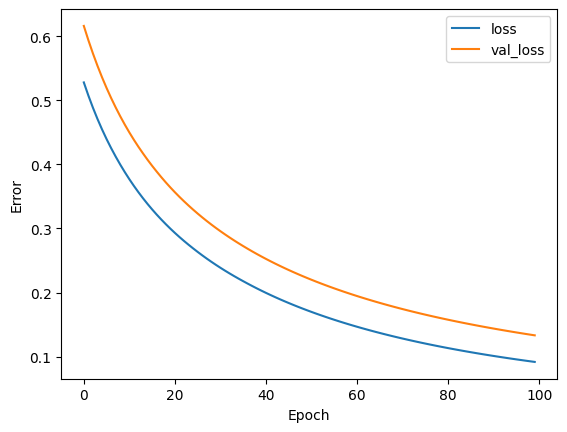

In [10]:
plt.plot(history_base.history['loss'], label='loss')
plt.plot(history_base.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

### Metricas

In [11]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred_base = base.predict(X_test)
#y_pred_base_classes = np.argmax(y_pred_base, axis=1)
#y_pred_base_classes
y_pred_base

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


array([[0.13547334],
       [0.953961  ],
       [0.01119258],
       [0.12520231],
       [0.13214166],
       [0.8983602 ],
       [0.21317926],
       [0.06474998],
       [0.03659035],
       [0.14374395],
       [0.09051067],
       [0.8599871 ],
       [0.9271327 ],
       [0.8819205 ],
       [0.9736281 ],
       [0.18951708],
       [0.03353395],
       [0.10594991],
       [0.11749126],
       [0.02640646],
       [0.9171823 ],
       [0.08430191],
       [0.9258315 ],
       [0.02975439],
       [0.14128482],
       [0.04888567],
       [0.02506949],
       [0.04177884],
       [0.8424551 ],
       [0.88211507]], dtype=float32)

In [13]:
y_test

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

In [14]:
print(y_test[0][0])
print(y_pred_base[0][0])

0.0
0.13547334


[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


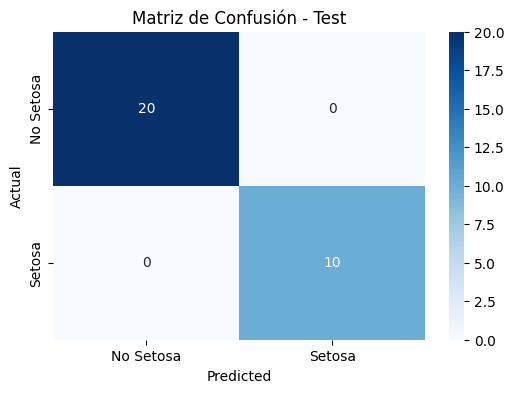

In [15]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_base = to_binary_predictions(y_pred_base)

print(y_pred_base)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_base)
precision = precision_score(y_test, y_pred_base)
recall = recall_score(y_test, y_pred_base)
f1 = f1_score(y_test, y_pred_base)
f2 = fbeta_score(y_test, y_pred_base, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_base)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_base)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
--- MÉTRICAS DEL MODELO (Validación) ---
Accuracy: 0.9583
Precision: 1.0000
Recall: 0.8750
F1 Score: 0.9333
F2 Score: 0.8974
ROC AUC Score: 0.9375


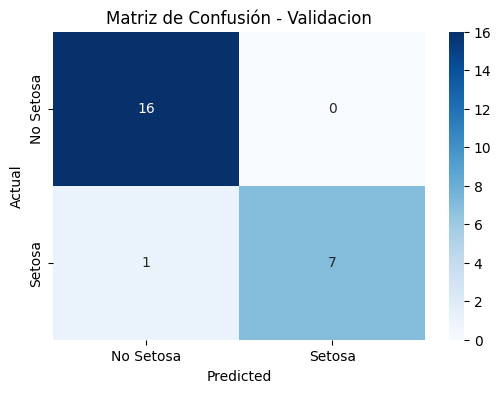

In [16]:



# Evaluación en conjunto de validación
y_pred_base_validation = base.predict(X_valid)
y_pred_base_validation = to_binary_predictions(y_pred_base_validation)


accuracy = accuracy_score(y_valid, y_pred_base_validation)
precision = precision_score(y_valid, y_pred_base_validation)
recall = recall_score(y_valid, y_pred_base_validation)
f1 = f1_score(y_valid, y_pred_base_validation)
f2 = fbeta_score(y_valid, y_pred_base_validation, beta=2)
roc_auc = roc_auc_score(y_valid, y_pred_base_validation)

print("--- MÉTRICAS DEL MODELO (Validación) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


# Matriz de confusión
conf_matrix = confusion_matrix(y_valid, y_pred_base_validation)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels =  ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Validacion')
plt.show()



### Nuevos modelos 

**modelo 3 capas y (10,15,20) neuronas**

In [17]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m1 = tf.keras.Sequential()
m1.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m1.add(tf.keras.layers.Dense(10, activation="relu"))
m1.add(tf.keras.layers.Dense(15, activation="relu"))
m1.add(tf.keras.layers.Dense(20, activation="relu"))
m1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [18]:
m1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556 (2.17 KB)

 Trainable params: 556 (2.17 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
m1.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [20]:
history_m1 = m1.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.1393 - loss: 0.7533 - val_accuracy: 0.1250 - val_loss: 0.7557
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1745 - loss: 0.7453 - val_accuracy: 0.1250 - val_loss: 0.7476
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2148 - loss: 0.7376 - val_accuracy: 0.1667 - val_loss: 0.7397
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2240 - loss: 0.7301 - val_accuracy: 0.1667 - val_loss: 0.7321
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2513 - loss: 0.7229 - val_accuracy: 0.2500 - val_loss: 0.7246
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.2917 - loss: 0.7159 - val_accuracy: 0.3333 - val_loss: 0.7173
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3542 - loss: 0.7091 - val_accuracy: 0.4583 - val_loss: 0.7102
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4635 - loss: 0.7025 - val_accuracy: 0.5000 - val_loss

In [21]:
y_pred_m1 = m1.predict(X_test)
y_pred_m1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.2679664 ],
       [0.8653178 ],
       [0.22303325],
       [0.26584387],
       [0.23890404],
       [0.8656948 ],
       [0.24693404],
       [0.28659213],
       [0.15620638],
       [0.21764821],
       [0.31520876],
       [0.9006333 ],
       [0.8980508 ],
       [0.9074238 ],
       [0.91433203],
       [0.3202493 ],
       [0.31300768],
       [0.19106159],
       [0.2558415 ],
       [0.26987195],
       [0.90706754],
       [0.3036769 ],
       [0.88880473],
       [0.2728971 ],
       [0.34329364],
       [0.2851236 ],
       [0.22318432],
       [0.3173517 ],
       [0.87027687],
       [0.89245844]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


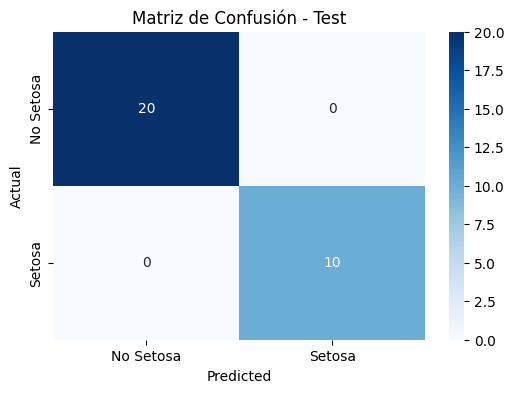

In [22]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_m1 = to_binary_predictions(y_pred_m1)

print(y_pred_m1)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m1)
precision = precision_score(y_test, y_pred_m1)
recall = recall_score(y_test, y_pred_m1)
f1 = f1_score(y_test, y_pred_m1)
f2 = fbeta_score(y_test, y_pred_m1, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m1)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

**modelo 5 capas y (5,7,21,30,5) neuronas**

In [23]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m2 = tf.keras.Sequential()
m2.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m2.add(tf.keras.layers.Dense(5, activation="relu"))
m2.add(tf.keras.layers.Dense(7, activation="relu"))
m2.add(tf.keras.layers.Dense(21, activation="relu"))
m2.add(tf.keras.layers.Dense(30, activation="relu"))
m2.add(tf.keras.layers.Dense(5, activation="relu"))
m2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [24]:
m2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 21)             │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           155 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,056 (4.12 KB)

 Trainable params: 1,056 (4.12 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
m2.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
history_m2 = m2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - accuracy: 0.6810 - loss: 0.7138 - val_accuracy: 0.6667 - val_loss: 0.7102
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6810 - loss: 0.7099 - val_accuracy: 0.6667 - val_loss: 0.7068
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6810 - loss: 0.7060 - val_accuracy: 0.6667 - val_loss: 0.7035
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6810 - loss: 0.7022 - val_accuracy: 0.6667 - val_loss: 0.7002
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6810 - loss: 0.6984 - val_accuracy: 0.6667 - val_loss: 0.6970
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6810 - loss: 0.6946 - val_accuracy: 0.6667 - val_loss: 0.6934
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6810 - loss: 0.6904 - val_accuracy: 0.6667 - val_loss: 0.6881
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6810 - loss: 0.6844 - val_accuracy: 0.6667 - val_loss

In [27]:
y_pred_m2 = m2.predict(X_test)
y_pred_m2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[0.15799709],
       [0.8394148 ],
       [0.12884274],
       [0.1572765 ],
       [0.14853668],
       [0.7569806 ],
       [0.18350449],
       [0.14156766],
       [0.18177985],
       [0.18502311],
       [0.14685377],
       [0.79888165],
       [0.8140178 ],
       [0.811342  ],
       [0.8952828 ],
       [0.14761494],
       [0.14418045],
       [0.18620256],
       [0.18547063],
       [0.15018098],
       [0.84334934],
       [0.15522046],
       [0.831813  ],
       [0.1509528 ],
       [0.13119437],
       [0.14463037],
       [0.1526377 ],
       [0.13643976],
       [0.76123977],
       [0.8124969 ]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


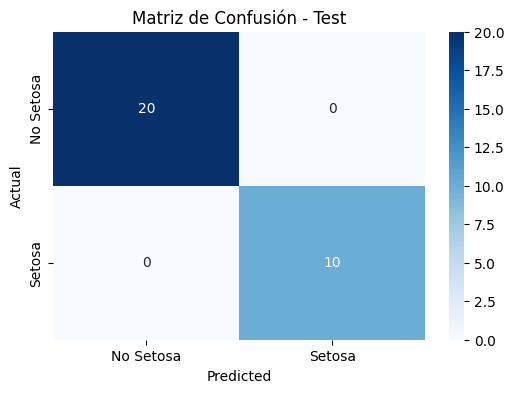

In [28]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_m2 = to_binary_predictions(y_pred_m2)

print(y_pred_m2)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m2)
precision = precision_score(y_test, y_pred_m2)
recall = recall_score(y_test, y_pred_m2)
f1 = f1_score(y_test, y_pred_m2)
f2 = fbeta_score(y_test, y_pred_m2, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m2)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m2)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

**modelo 4 capas y (8,20,35,46) neuronas**

In [29]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()
m3 = tf.keras.Sequential()
m3.add(tf.keras.layers.InputLayer(input_shape=(4,)))
m3.add(tf.keras.layers.Dense(8, activation="relu"))
m3.add(tf.keras.layers.Dense(20, activation="relu"))
m3.add(tf.keras.layers.Dense(35, activation="relu"))
m3.add(tf.keras.layers.Dense(46, activation="relu"))
m3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

C:\Users\marti\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [30]:
m3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 35)             │           735 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 46)             │         1,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            47 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,658 (10.38 KB)

 Trainable params: 2,658 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
m3.compile(loss="binary_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [32]:
history_m3 = m3.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 0.5521 - loss: 0.6411 - val_accuracy: 0.6250 - val_loss: 0.6242
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6055 - loss: 0.6358 - val_accuracy: 0.6667 - val_loss: 0.6189
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6589 - loss: 0.6304 - val_accuracy: 0.7500 - val_loss: 0.6137
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7253 - loss: 0.6251 - val_accuracy: 0.7500 - val_loss: 0.6084
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7604 - loss: 0.6197 - val_accuracy: 0.7500 - val_loss: 0.6031
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7695 - loss: 0.6143 - val_accuracy: 0.8750 - val_loss: 0.5977
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8047 - loss: 0.6089 - val_accuracy: 0.8750 - val_loss: 0.5924
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8190 - loss: 0.6034 - val_accuracy: 0.8750 - val_loss

In [33]:
y_pred_m3 = m3.predict(X_test)
y_pred_m3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.26281354],
       [0.9294754 ],
       [0.23514186],
       [0.2606805 ],
       [0.2488122 ],
       [0.9060655 ],
       [0.26208273],
       [0.24672058],
       [0.24450491],
       [0.25856373],
       [0.25497133],
       [0.9377292 ],
       [0.9369218 ],
       [0.9439394 ],
       [0.9776624 ],
       [0.2694741 ],
       [0.25142214],
       [0.2612401 ],
       [0.2664957 ],
       [0.2475116 ],
       [0.957251  ],
       [0.2586234 ],
       [0.9467469 ],
       [0.2493106 ],
       [0.3384768 ],
       [0.24873513],
       [0.24385726],
       [0.25248092],
       [0.91555923],
       [0.93962115]], dtype=float32)

[[0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
F2 Score: 1.0000
ROC AUC Score: 1.0000


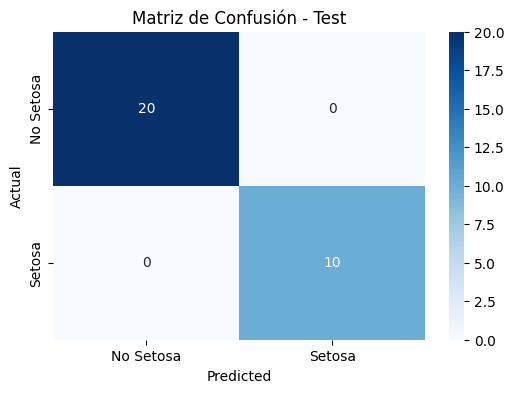

In [34]:
y_test.astype(int).flatten().tolist()

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_m3 = to_binary_predictions(y_pred_m3)

print(y_pred_m3)



# Evaluación
accuracy = accuracy_score(y_test, y_pred_m3)
precision = precision_score(y_test, y_pred_m3)
recall = recall_score(y_test, y_pred_m3)
f1 = f1_score(y_test, y_pred_m3)
f2 = fbeta_score(y_test, y_pred_m3, beta=2)
roc_auc = roc_auc_score(y_test, y_pred_m3)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_m3)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

## Punto 2: Clasificacion con redes neuronales - Datos heart

### Modelo Base

In [35]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [36]:
df = pd.read_csv('heart.csv')

In [37]:
df.shape

(303, 14)

In [38]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Seleccion de variables:**
Se seleccionan el siguinete subconjunto de variables: 

categoricas numericas: 'sex', 'exang', 'fbs'

categorica string: 'thal'

numerica: 'age', 'trestbps', 'chol'

In [39]:
df.drop(columns=['cp', 'restecg','ca','thalach', 'oldpeak', 'slope'])

,age,sex,trestbps,chol,fbs,exang,thal,target
0,63,1,145,233,1,0,fixed,0
1,67,1,160,286,0,1,normal,1
2,67,1,120,229,0,1,reversible,0
3,37,1,130,250,0,0,normal,0
4,41,0,130,204,0,0,normal,0
...,...,...,...,...,...,...,...,...
298,52,1,118,186,0,0,fixed,0
299,43,0,132,341,1,1,reversible,1
300,65,1,135,254,0,0,reversible,1
301,48,1,130,256,1,1,reversible,1


In [40]:
cat_int_feats = ['sex', 'fbs', 'exang']
cat_str_feats = ['thal']
num_feats = ['age', 'trestbps', 'chol']

In [41]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats

In [42]:
df = df[feats_ordered+['target']]

In [43]:
df.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
0,1,1,0,fixed,63,145,233,0
1,1,0,1,normal,67,160,286,1
2,1,0,1,reversible,67,120,229,0
3,1,0,0,normal,37,130,250,0
4,0,0,0,normal,41,130,204,0


Separacion de conjuntos: 

In [44]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
69,0,0,0,normal,35,138,183,0
300,1,0,0,reversible,65,135,254,1
220,1,0,0,normal,59,134,204,0
134,1,1,0,reversible,42,120,240,0
7,0,0,1,normal,57,120,354,0


In [45]:
train.shape

(242, 8)

In [46]:
test = df.drop(train.index)
test.head()

,sex,fbs,exang,thal,age,trestbps,chol,target
0,1,1,0,fixed,63,145,233,0
2,1,0,1,reversible,67,120,229,0
4,0,0,0,normal,41,130,204,0
8,1,0,0,reversible,63,130,254,1
13,1,0,0,reversible,44,120,263,0


In [47]:
test.shape

(61, 8)

In [48]:
val = train.sample(frac=0.2, random_state=100)

In [49]:
val.shape

(48, 8)

In [50]:
train = train.drop(val.index)

In [51]:
print(train.shape)
print(val.shape)
print(test.shape)

(194, 8)
(48, 8)
(61, 8)


Función para convertir de dataframe (pandas) a dataset (tensorflow), separando características y etiquetas

In [52]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("target")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [53]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [54]:
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [55]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'reversible'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=65>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=135>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=254>}
Target: tf.Tensor(1, shape=(), dtype=int64)


In [56]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [57]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

In [58]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

In [59]:
inputs = []
for i in cat_int_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [60]:
for i in cat_str_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [61]:
for i in num_feats:
  inputs.append(keras.Input(shape=(1,), name=i))

In [62]:
for i in inputs:
   print(i)

<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=sex>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=fbs>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, ragged=False, name=exang>
<KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=thal>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=trestbps>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=chol>


In [63]:
feats_encoded=[]

In [64]:
for i,feat in enumerate(cat_int_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )

In [65]:
len_feats = len(feats_encoded)
len_feats

3

In [66]:
for i,feat in enumerate(cat_str_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )

In [67]:
len_feats = len(feats_encoded)
len_feats

4

In [68]:
for i,feat in enumerate(num_feats):
  feats_encoded.append(
      encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
  )

In [69]:
for i in feats_encoded:
  print(i)

<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_16>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_17>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_18>
<KerasTensor shape=(None, 6), dtype=float32, sparse=False, ragged=False, name=keras_tensor_19>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_20>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_21>
<KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_22>


Creamos una capa concatenando todas las variables codificadas

In [70]:
all_feats = keras.layers.concatenate(feats_encoded)

In [71]:
type(all_feats)

keras.src.backend.common.keras_tensor.KerasTensor

Agregamos una capa densa con 32 neuronas y función de activación relu

In [72]:
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)

Creamos una capa concatenando todas las variables codificadas

In [73]:
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

Creamos el modelo con las capas ya creadas y las variables de entrada

In [74]:
model = keras.Model(inputs, model_layers)

Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar

In [75]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [76]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Aseguramos que Keras use TensorFlow como backend, para asegurar que el modelo pueda usar strings como entradas

In [77]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

### Entrenamineto

In [78]:
hostory = model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.4269 - loss: 0.7515 - val_accuracy: 0.4375 - val_loss: 0.6972
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4702 - loss: 0.7401 - val_accuracy: 0.5833 - val_loss: 0.6659
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5419 - loss: 0.6864 - val_accuracy: 0.6875 - val_loss: 0.6326
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5800 - loss: 0.6661 - val_accuracy: 0.6875 - val_loss: 0.6035
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6885 - loss: 0.6167 - val_accuracy: 0.7500 - val_loss: 0.5809
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6702 - loss: 0.6191 - val_accuracy: 0.7500 - val_loss: 0.5625
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7324 - loss: 0.5893 - val_accuracy: 0.7500 - val_loss: 0.5462
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7023 - loss: 0.5795 - val_accuracy: 0.7500 - val_loss: 0.53

In [79]:
print(test_ds)
y_pred_modelo= model.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo


<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
61


array([[0.05240647],
       [0.00771926],
       [0.01906209],
       [0.00541213],
       [0.34150866],
       [0.04522864],
       [0.17674427],
       [0.5220183 ],
       [0.06744321],
       [0.1734511 ],
       [0.22518528],
       [0.03563103],
       [0.38391316],
       [0.13769527],
       [0.39892948],
       [0.6888165 ],
       [0.52179027],
       [0.03045184],
       [0.6258021 ],
       [0.07543401],
       [0.23616578],
       [0.6960144 ],
       [0.69041467],
       [0.04985461],
       [0.6763768 ],
       [0.41166452],
       [0.120386  ],
       [0.03676081],
       [0.0833927 ],
       [0.01971038],
       [0.18666461],
       [0.00789485],
       [0.64213765],
       [0.03222859],
       [0.55821836],
       [0.00622822],
       [0.15865567],
       [0.34104577],
       [0.02188313],
       [0.00990161],
       [0.08974668],
       [0.7512139 ],
       [0.63995445],
       [0.6592694 ],
       [0.12105883],
       [0.00996684],
       [0.08761266],
       [0.486

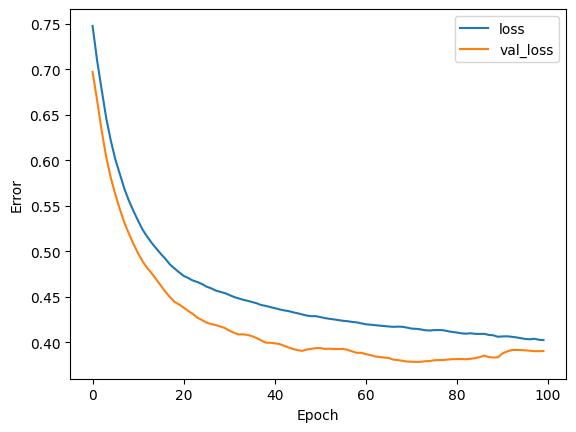

In [80]:
plt.plot(hostory.history['loss'], label='loss')
plt.plot(hostory.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

[0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
--- MÉTRICAS DEL MODELO (Entrenamiento) ---
Accuracy: 0.5738
Precision: 0.3333
Recall: 0.2381
F1 Score: 0.2778
F2 Score: 0.2525
ROC AUC Score: 0.4940


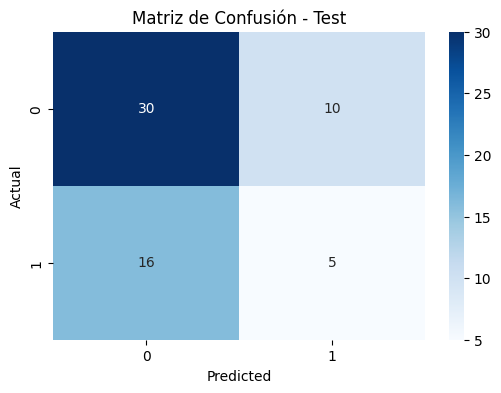

In [81]:
y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

### Modificar optimizador

Con:SDG

In [82]:
feats_encoded

[<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_16>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_17>,
 <KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_18>,
 <KerasTensor shape=(None, 6), dtype=float32, sparse=False, ragged=False, name=keras_tensor_19>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_20>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_21>,
 <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor_22>]

In [83]:
all_feats_opti_1 = keras.layers.concatenate(feats_encoded)
model_layers_opti_1 = keras.layers.Dense(32, activation='relu')(all_feats_opti_1)
model_layers_opti_1 = keras.layers.Dense(1, activation='sigmoid')(model_layers_opti_1)
model_opti_1 = keras.Model(inputs, model_layers_opti_1)

model_opti_1.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4012 - loss: 0.7805 - val_accuracy: 0.4375 - val_loss: 0.7627
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4573 - loss: 0.7423 - val_accuracy: 0.5208 - val_loss: 0.7238
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5088 - loss: 0.6870 - val_accuracy: 0.5417 - val_loss: 0.6943
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5169 - loss: 0.6780 - val_accuracy: 0.5833 - val_loss: 0.6679
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5902 - loss: 0.6452 - val_accuracy: 0.6250 - val_loss: 0.6448
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6255 - loss: 0.6333 - val_accuracy: 0.6667 - val_loss: 0.6309
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5908 - loss: 0.6551 - val_accuracy: 0.6667 - val_loss: 0.6199
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6785 - loss: 0.6198 - val_accuracy: 0.6875 - val_loss: 0.6090
Epoch

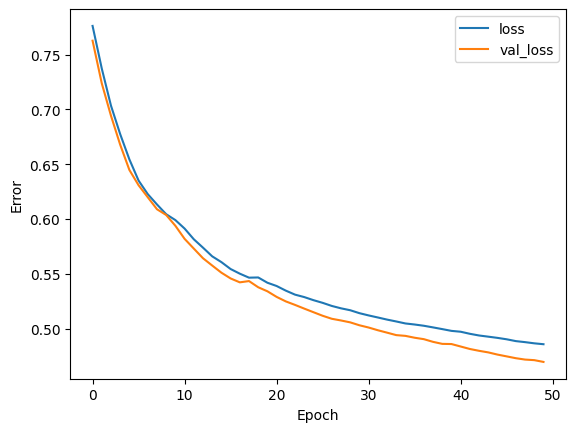

In [84]:
history_model_opti_1 = model_opti_1.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_opti_1.history['loss'], label='loss')
plt.plot(history_model_opti_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
61
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

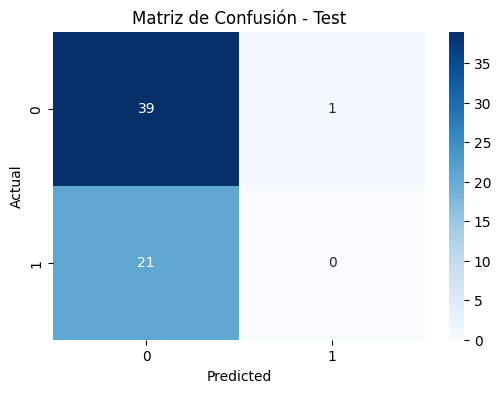

In [85]:
print(test_ds)
y_pred_modelo= model_opti_1.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

con: adamw

In [86]:
all_feats_opti_2 = keras.layers.concatenate(feats_encoded)
model_layers_opti_2 = keras.layers.Dense(32, activation='relu')(all_feats_opti_2)
model_layers_opti_2 = keras.layers.Dense(1, activation='sigmoid')(model_layers_opti_2)
model_opti_2 = keras.Model(inputs, model_layers_opti_2)

model_opti_2.compile(optimizer='adamw', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.3455 - loss: 0.7723 - val_accuracy: 0.4375 - val_loss: 0.7128
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5129 - loss: 0.6922 - val_accuracy: 0.5417 - val_loss: 0.6698
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5737 - loss: 0.6690 - val_accuracy: 0.6667 - val_loss: 0.6347
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6453 - loss: 0.6490 - val_accuracy: 0.7708 - val_loss: 0.6054
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 0.6187 - val_accuracy: 0.7917 - val_loss: 0.5814
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7402 - loss: 0.5908 - val_accuracy: 0.7917 - val_loss: 0.5613
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7675 - loss: 0.5617 - val_accuracy: 0.7708 - val_loss: 0.5443
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7576 - loss: 0.5665 - val_accuracy: 0.7708 - val_loss: 0.5306
Epoch 

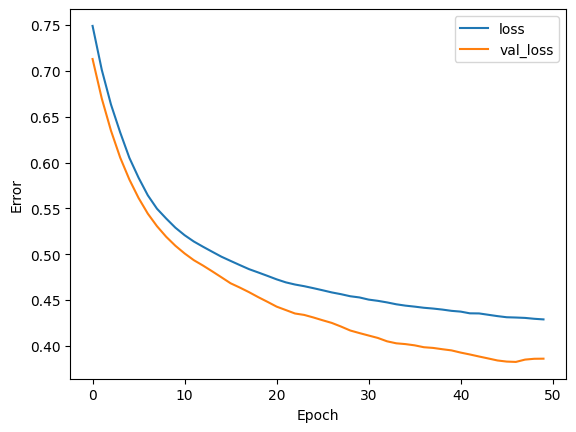

In [87]:
history_model_opti_2 = model_opti_2.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_opti_2.history['loss'], label='loss')
plt.plot(history_model_opti_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
61
[0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]
-

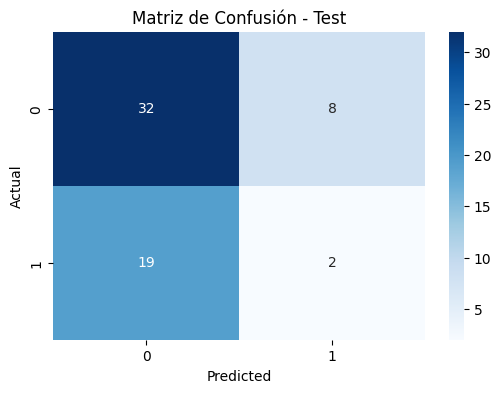

In [88]:
print(test_ds)
y_pred_modelo= model_opti_2.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

### Modificar tasa de aprendizaje

tasa: 0.0005 

In [89]:
all_feats_tasa_1 = keras.layers.concatenate(feats_encoded)
model_layers_tasa_1 = keras.layers.Dense(32, activation='relu')(all_feats_tasa_1)
model_layers_tasa_1 = keras.layers.Dense(1, activation='sigmoid')(model_layers_tasa_1)
model_tasa_1 = keras.Model(inputs, model_layers_tasa_1)

model_tasa_1.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3660 - loss: 0.8039 - val_accuracy: 0.3333 - val_loss: 0.7940
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3198 - loss: 0.8163 - val_accuracy: 0.3542 - val_loss: 0.7718
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3426 - loss: 0.7824 - val_accuracy: 0.4375 - val_loss: 0.7510
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3982 - loss: 0.7518 - val_accuracy: 0.4583 - val_loss: 0.7312
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4394 - loss: 0.7285 - val_accuracy: 0.4792 - val_loss: 0.7133
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4668 - loss: 0.7101 - val_accuracy: 0.4583 - val_loss: 0.6966
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5135 - loss: 0.6911 - val_accuracy: 0.5000 - val_loss: 0.6813
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5405 - loss: 0.6881 - val_accuracy: 0.5417 - val_loss: 0.6682
Epoch 9

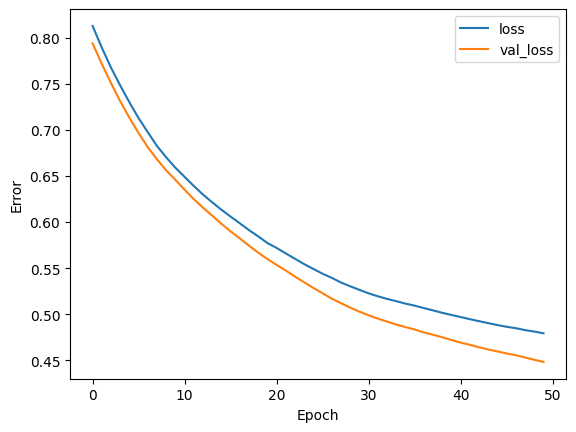

In [90]:
history_model_tasa_1 = model_tasa_1.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_tasa_1.history['loss'], label='loss')
plt.plot(history_model_tasa_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
61
[0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
61
[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

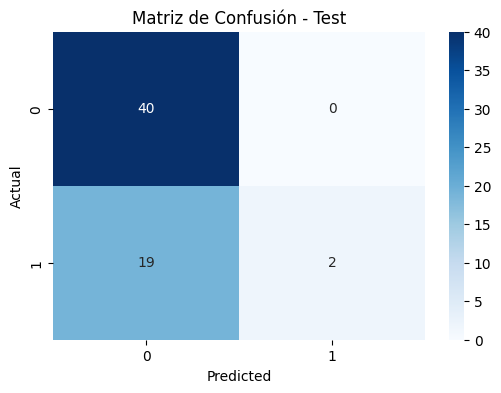

In [91]:
print(test_ds)
y_pred_modelo= model_tasa_1.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

tasa:0.0001 

In [92]:
all_feats_tasa_2 = keras.layers.concatenate(feats_encoded)
model_layers_tasa_2 = keras.layers.Dense(32, activation='relu')(all_feats_tasa_2)
model_layers_tasa_2 = keras.layers.Dense(1, activation='sigmoid')(model_layers_tasa_2)
model_tasa_2 = keras.Model(inputs, model_layers_tasa_2)

model_tasa_2.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5433 - loss: 0.7183 - val_accuracy: 0.5417 - val_loss: 0.6968
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5524 - loss: 0.7113 - val_accuracy: 0.5417 - val_loss: 0.6918
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5370 - loss: 0.7089 - val_accuracy: 0.6042 - val_loss: 0.6870
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5092 - loss: 0.7078 - val_accuracy: 0.6042 - val_loss: 0.6821
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4959 - loss: 0.7094 - val_accuracy: 0.6042 - val_loss: 0.6774
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5441 - loss: 0.6769 - val_accuracy: 0.5833 - val_loss: 0.6727
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5324 - loss: 0.6962 - val_accuracy: 0.5833 - val_loss: 0.6684
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5283 - loss: 0.6935 - val_accuracy: 0.5833 - val_loss: 0.6644
Epoch 

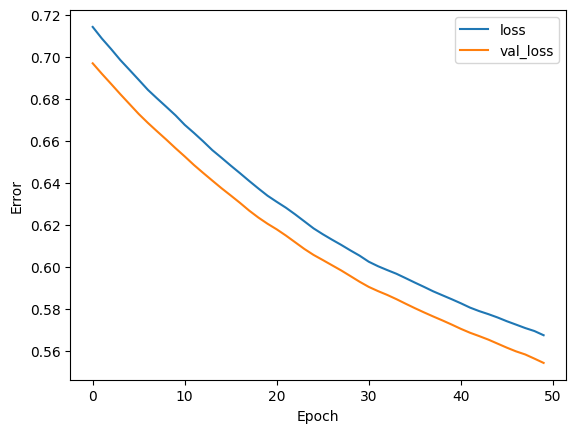

In [93]:
history_model_tasa_2 = model_tasa_2.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_tasa_2.history['loss'], label='loss')
plt.plot(history_model_tasa_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step
61
[0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

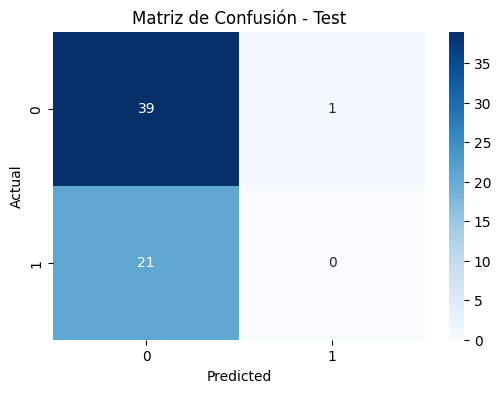

In [94]:
print(test_ds)
y_pred_modelo= model_tasa_2.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

tasa: 0.007

In [95]:
all_feats_tasa_3 = keras.layers.concatenate(feats_encoded)
model_layers_tasa_3 = keras.layers.Dense(32, activation='relu')(all_feats_tasa_3)
model_layers_tasa_3 = keras.layers.Dense(1, activation='sigmoid')(model_layers_tasa_3)
model_tasa_3 = keras.Model(inputs, model_layers_tasa_3)

model_tasa_3.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6843 - loss: 0.6283 - val_accuracy: 0.7500 - val_loss: 0.5064
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7148 - loss: 0.5456 - val_accuracy: 0.7500 - val_loss: 0.4781
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7496 - loss: 0.4742 - val_accuracy: 0.7708 - val_loss: 0.4391
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7581 - loss: 0.4714 - val_accuracy: 0.8333 - val_loss: 0.4204
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7793 - loss: 0.4345 - val_accuracy: 0.8333 - val_loss: 0.4048
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7347 - loss: 0.4834 - val_accuracy: 0.8333 - val_loss: 0.3920
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7598 - loss: 0.4587 - val_accuracy: 0.8333 - val_loss: 0.3833
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8056 - loss: 0.4038 - val_accuracy: 0.8333 - val_loss: 0.3843
Epoc

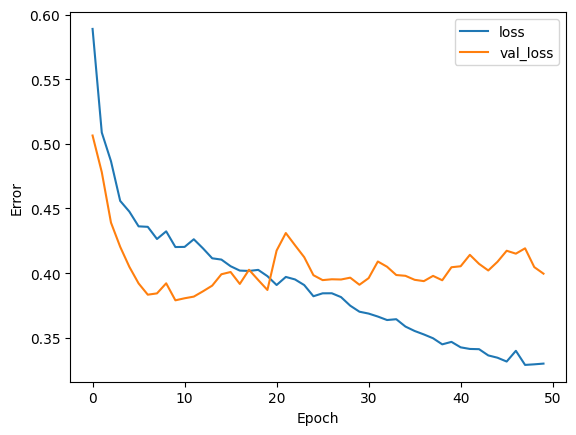

In [96]:
history_model_tasa_3 = model_tasa_3.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_tasa_3.history['loss'], label='loss')
plt.plot(history_model_tasa_3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
61
[0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0]
61
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]]
-

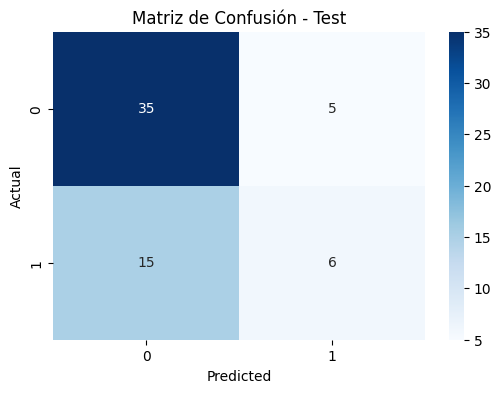

In [97]:
print(test_ds)
y_pred_modelo= model_tasa_3.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

### Modificar funciones de activacion

celu 

In [98]:
all_feats_fun_1 = keras.layers.concatenate(feats_encoded)
model_layers_fun_1 = keras.layers.Dense(32, activation='celu')(all_feats_fun_1)
model_layers_fun_1 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fun_1)
model_fun_1 = keras.Model(inputs, model_layers_fun_1)

model_fun_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5355 - loss: 0.7251 - val_accuracy: 0.6875 - val_loss: 0.6598
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6181 - loss: 0.6943 - val_accuracy: 0.6875 - val_loss: 0.6150
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7121 - loss: 0.6423 - val_accuracy: 0.7500 - val_loss: 0.5805
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7371 - loss: 0.6038 - val_accuracy: 0.7500 - val_loss: 0.5543
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7350 - loss: 0.5834 - val_accuracy: 0.7500 - val_loss: 0.5330
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7397 - loss: 0.5739 - val_accuracy: 0.7500 - val_loss: 0.5190
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7762 - loss: 0.5313 - val_accuracy: 0.7500 - val_loss: 0.5067
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7614 - loss: 0.5248 - val_accuracy: 0.7500 - val_loss: 0.4947
Epoch

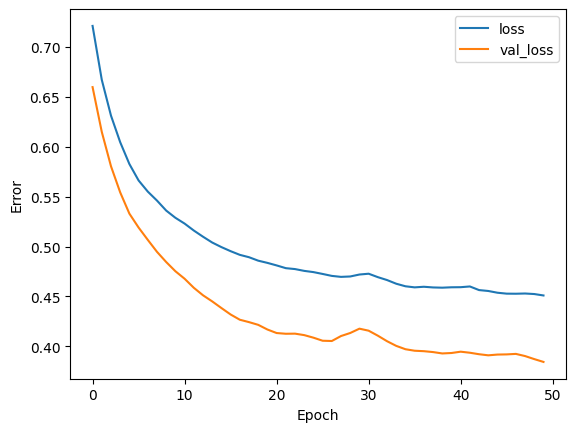

In [99]:
history_model_fun_1 = model_fun_1.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fun_1.history['loss'], label='loss')
plt.plot(history_model_fun_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
61
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
-

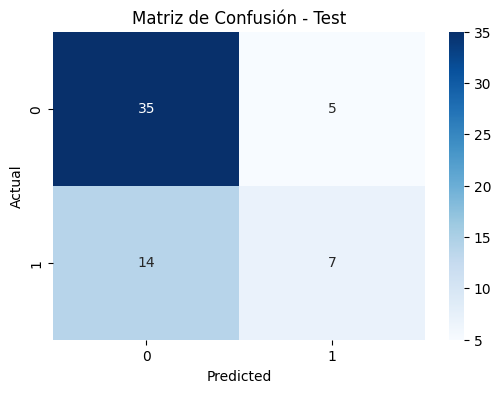

In [100]:
print(test_ds)
y_pred_modelo= model_fun_1.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

exponential 

In [101]:
all_feats_fun_2 = keras.layers.concatenate(feats_encoded)
model_layers_fun_2 = keras.layers.Dense(32, activation='exponential')(all_feats_fun_2)
model_layers_fun_2 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fun_2)
model_fun_2 = keras.Model(inputs, model_layers_fun_2)

model_fun_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.2595 - loss: 1.3328 - val_accuracy: 0.2083 - val_loss: 1.1968
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2787 - loss: 1.1030 - val_accuracy: 0.3333 - val_loss: 0.9838
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3597 - loss: 0.8879 - val_accuracy: 0.4792 - val_loss: 0.8403
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5205 - loss: 0.7697 - val_accuracy: 0.6667 - val_loss: 0.7512
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6561 - loss: 0.7155 - val_accuracy: 0.6875 - val_loss: 0.6907
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7159 - loss: 0.6923 - val_accuracy: 0.7083 - val_loss: 0.6571
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7116 - loss: 0.6806 - val_accuracy: 0.7500 - val_loss: 0.6352
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7393 - loss: 0.6396 - val_accuracy: 0.7500 - val_loss: 0.6145
Epoc

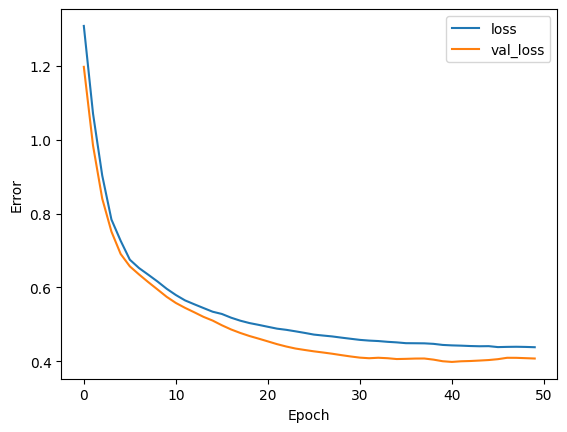

In [102]:
history_model_fun_2 = model_fun_2.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fun_2.history['loss'], label='loss')
plt.plot(history_model_fun_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
61
[1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0]
61
[[1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
-

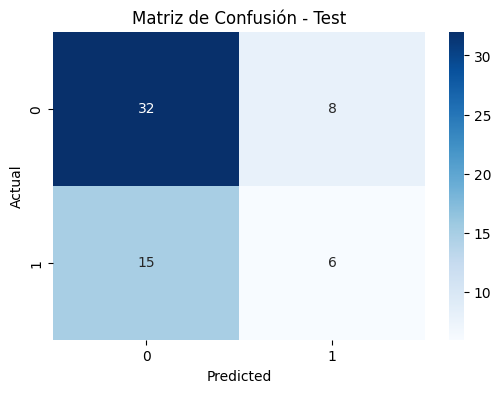

In [103]:
print(test_ds)
y_pred_modelo= model_fun_2.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

hard_tanh

In [104]:
all_feats_fun_3 = keras.layers.concatenate(feats_encoded)
model_layers_fun_3 = keras.layers.Dense(32, activation='hard_tanh')(all_feats_fun_3)
model_layers_fun_3 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fun_3)
model_fun_3 = keras.Model(inputs, model_layers_fun_3)

model_fun_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.3994 - loss: 0.9091 - val_accuracy: 0.4792 - val_loss: 0.8515
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4698 - loss: 0.7960 - val_accuracy: 0.5208 - val_loss: 0.7813
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5613 - loss: 0.7158 - val_accuracy: 0.5208 - val_loss: 0.7287
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5832 - loss: 0.6598 - val_accuracy: 0.6250 - val_loss: 0.6846
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6626 - loss: 0.6329 - val_accuracy: 0.6458 - val_loss: 0.6465
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6741 - loss: 0.5955 - val_accuracy: 0.7083 - val_loss: 0.6197
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6928 - loss: 0.5560 - val_accuracy: 0.7292 - val_loss: 0.5980
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7046 - loss: 0.5530 - val_accuracy: 0.7083 - val_loss: 0.5799
Epoch

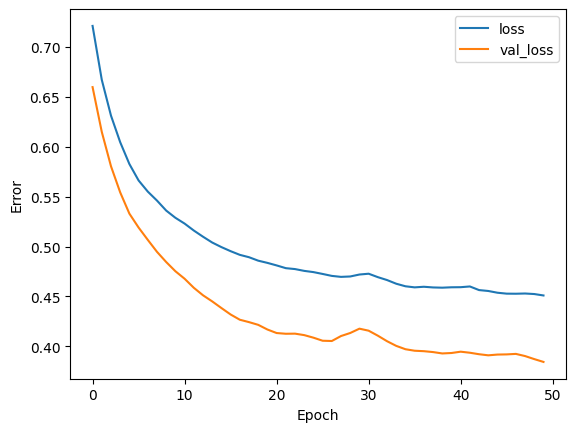

In [105]:
history_model_fun_3 = model_fun_3.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fun_1.history['loss'], label='loss')
plt.plot(history_model_fun_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
61
[0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1
 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]
61
[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]]
-

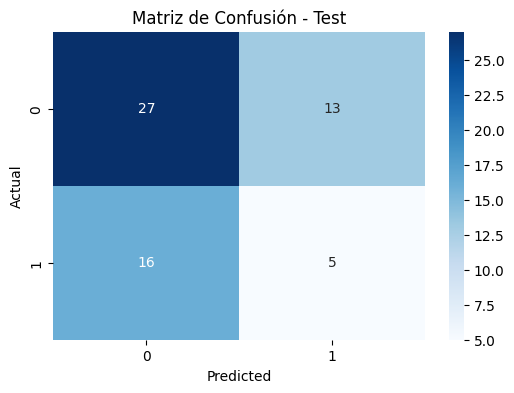

In [106]:
print(test_ds)
y_pred_modelo= model_fun_3.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

### Modelos Finales

De acuerdo al F1 se elegien los siguienetes parametros: 

-optimizador:AdamW

-tasa de aprendizaje:0.007

-funcion de activacion: celu

In [107]:
all_feats_fin_1 = keras.layers.concatenate(feats_encoded)
model_layers_fin_1 = keras.layers.Dense(32, activation='celu')(all_feats_fin_1)
model_layers_fin_1 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fin_1)
model_fin_1 = keras.Model(inputs, model_layers_fun_1)

model_fin_1.compile(optimizer=keras.optimizers.AdamW(
    learning_rate=0.007), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7548 - loss: 0.4786 - val_accuracy: 0.8333 - val_loss: 0.3839
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7800 - loss: 0.4219 - val_accuracy: 0.8333 - val_loss: 0.3834
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7467 - loss: 0.4430 - val_accuracy: 0.8333 - val_loss: 0.3838
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7625 - loss: 0.4371 - val_accuracy: 0.8333 - val_loss: 0.3863
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7397 - loss: 0.4527 - val_accuracy: 0.8333 - val_loss: 0.3881
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7651 - loss: 0.4324 - val_accuracy: 0.8333 - val_loss: 0.3893
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7496 - loss: 0.4452 - val_accuracy: 0.8333 - val_loss: 0.3894
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7478 - loss: 0.4489 - val_accuracy: 0.8333 - val_loss: 0.3897
Epoch 9

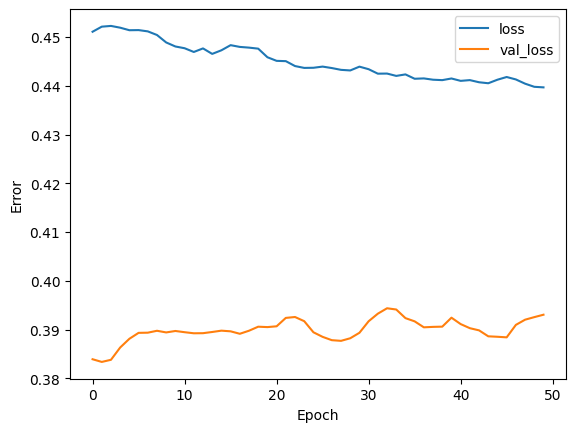

In [108]:
history_model_fin_1 = model_fun_1.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fin_1.history['loss'], label='loss')
plt.plot(history_model_fin_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
61
[1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0]
61
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
-

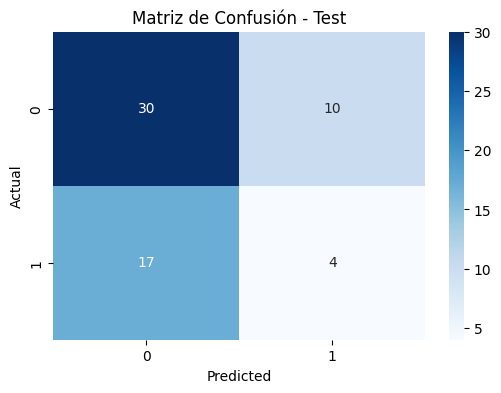

In [109]:
print(test_ds)
y_pred_modelo= model_fin_1.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()

De acuerdo al F1 se elegien los siguienetes parametros: 

-optimizador: adam

-tasa de aprendizaje:0.01

-funcion de activacion: relu

In [110]:
all_feats_fin_2 = keras.layers.concatenate(feats_encoded)
model_layers_fin_2 = keras.layers.Dense(32, activation='celu')(all_feats_fin_2)
model_layers_fin_2 = keras.layers.Dense(1, activation='sigmoid')(model_layers_fin_2)
model_fin_2 = keras.Model(inputs, model_layers_fin_2)

model_fin_2.compile(optimizer=keras.optimizers.Adam(
    learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.7587 - loss: 0.5143 - val_accuracy: 0.8125 - val_loss: 0.4078
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7685 - loss: 0.4516 - val_accuracy: 0.8542 - val_loss: 0.3919
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7358 - loss: 0.5019 - val_accuracy: 0.8125 - val_loss: 0.3904
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7615 - loss: 0.4594 - val_accuracy: 0.7917 - val_loss: 0.4162
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.4392 - val_accuracy: 0.7917 - val_loss: 0.4119
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7494 - loss: 0.4576 - val_accuracy: 0.8542 - val_loss: 0.4232
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7908 - loss: 0.4061 - val_accuracy: 0.7917 - val_loss: 0.4180
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7597 - loss: 0.4400 - val_accuracy: 0.7708 - val_loss: 0.4266
Epoch 

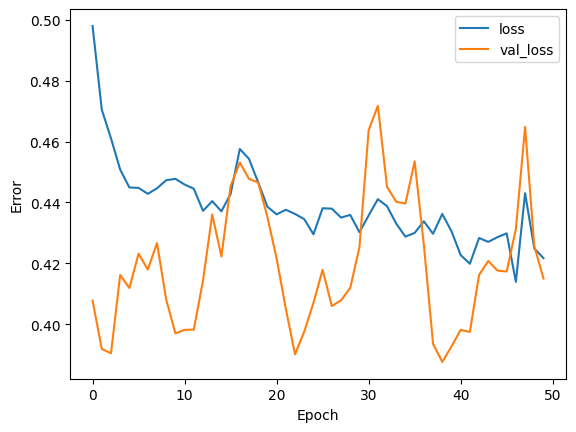

In [111]:
history_model_fin_2 = model_fin_2.fit(train_ds, epochs=50, validation_data=val_ds)
from matplotlib import pyplot as plt


plt.plot(history_model_fin_2.history['loss'], label='loss')
plt.plot(history_model_fin_2.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()

<_BatchDataset element_spec=({'sex': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'fbs': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'exang': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'thal': TensorSpec(shape=(None,), dtype=tf.string, name=None), 'age': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'trestbps': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'chol': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
61
[1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0]
61
[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]
-

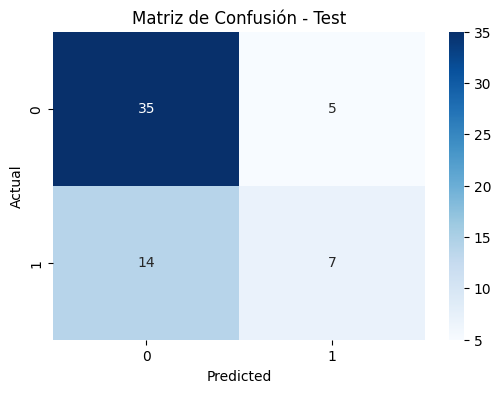

In [112]:
print(test_ds)
y_pred_modelo= model_fin_2.predict(test_ds)
print(len(y_pred_modelo))
y_pred_modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
print(y_true)
print(len(y_true))

def to_binary_predictions(array, threshold=0.5):
    return (array >= threshold).astype(int)


y_pred_modelo = to_binary_predictions(y_pred_modelo)

print(y_pred_modelo)



# Evaluación
accuracy = accuracy_score(y_true, y_pred_modelo)
precision = precision_score(y_true, y_pred_modelo)
recall = recall_score(y_true, y_pred_modelo)
f1 = f1_score(y_true, y_pred_modelo)
f2 = fbeta_score(y_true, y_pred_modelo, beta=2)
roc_auc = roc_auc_score(y_true, y_pred_modelo)

print("--- MÉTRICAS DEL MODELO (Entrenamiento) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"F2 Score: {f2:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_modelo)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')#, xticklabels = ['No Setosa', 'Setosa'], yticklabels= ['No Setosa', 'Setosa'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Test')
plt.show()